# Experimento: Intervertido vs Extrovertido

## Acesso e análise dos dados

In [269]:
import pandas as pd

In [270]:
df = pd.read_csv('https://raw.githubusercontent.com/zLianK/introvert-vs-extrovert-notebook/refs/heads/main/personality_datasert_converted.csv');
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,False,4.0,6.0,False,13.0,5.0,Extrovert
1,9.0,True,0.0,0.0,True,0.0,3.0,Introvert
2,9.0,True,1.0,2.0,True,5.0,2.0,Introvert
3,0.0,False,6.0,7.0,False,14.0,8.0,Extrovert
4,3.0,False,9.0,4.0,False,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,False,7.0,6.0,False,6.0,6.0,Extrovert
2896,3.0,False,8.0,3.0,False,14.0,9.0,Extrovert
2897,4.0,True,1.0,1.0,True,4.0,0.0,Introvert
2898,11.0,True,1.0,3.0,True,2.0,0.0,Introvert


In [271]:
df.dtypes

Time_spent_Alone             float64
Stage_fear                      bool
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing       bool
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

## Pré-processamento

In [272]:
X = df[df.columns[:-1]]
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,False,4.0,6.0,False,13.0,5.0
1,9.0,True,0.0,0.0,True,0.0,3.0
2,9.0,True,1.0,2.0,True,5.0,2.0
3,0.0,False,6.0,7.0,False,14.0,8.0
4,3.0,False,9.0,4.0,False,8.0,5.0
...,...,...,...,...,...,...,...
2895,3.0,False,7.0,6.0,False,6.0,6.0
2896,3.0,False,8.0,3.0,False,14.0,9.0
2897,4.0,True,1.0,1.0,True,4.0,0.0
2898,11.0,True,1.0,3.0,True,2.0,0.0


In [273]:
y = df[df.columns[-1]]
y

0       Extrovert
1       Introvert
2       Introvert
3       Extrovert
4       Extrovert
          ...    
2895    Extrovert
2896    Extrovert
2897    Introvert
2898    Introvert
2899    Extrovert
Name: Personality, Length: 2900, dtype: object

In [274]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Processamento

### Treinamento

In [275]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import numpy as np

params_svm = {
    'C': np.logspace(-3, 3, 5),
    'gamma': ['scale', 'auto']
}

clf_svm = RandomizedSearchCV(
    SVC(), params_svm, n_iter=10, random_state=42
)
clf_svm = clf_svm.fit(X_train, y_train)

In [276]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

params_ensemble = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'criterion': ['entropy'],
    'bootstrap': [True, False]
}

clf_ensemble = RandomizedSearchCV(
    RandomForestClassifier(), params_ensemble, n_iter=10, random_state=42
)
clf_ensemble = clf_ensemble.fit(X_train, y_train)

In [277]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

params_linear = {
    'C': np.logspace(-4, 4, 10),
}

clf_linear = RandomizedSearchCV(
    LogisticRegression(), params_linear, n_iter=10, random_state=42
)
clf_linear = clf_linear.fit(X_train, y_train)

In [278]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

params_tree = {
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 5, 10, 20]
}

clf_tree = RandomizedSearchCV(
    DecisionTreeClassifier(), params_tree, n_iter=10, random_state=42
)
clf_tree = clf_tree.fit(X_train, y_train)

### Teste

In [279]:
y_pred_svm = clf_svm.predict(X_test)
y_pred_ensemble = clf_ensemble.predict(X_test)
y_pred_linear = clf_linear.predict(X_test)
y_pred_tree = clf_tree.predict(X_test)

## Avaliação

In [280]:
target_names = ["Extrovert", "Introvert"]

In [281]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

   Extrovert       0.93      0.93      0.93       378
   Introvert       0.92      0.93      0.93       347

    accuracy                           0.93       725
   macro avg       0.93      0.93      0.93       725
weighted avg       0.93      0.93      0.93       725



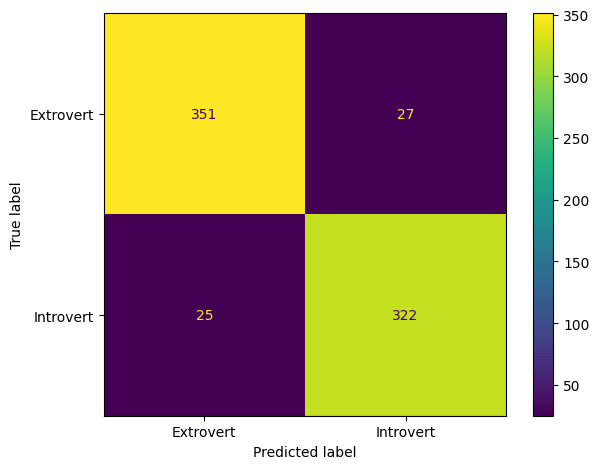

In [282]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf_svm, X_test, y_test, display_labels=target_names
)
plt.tight_layout()
plt.show()

In [283]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_ensemble, target_names=target_names))

              precision    recall  f1-score   support

   Extrovert       0.93      0.93      0.93       378
   Introvert       0.92      0.93      0.93       347

    accuracy                           0.93       725
   macro avg       0.93      0.93      0.93       725
weighted avg       0.93      0.93      0.93       725



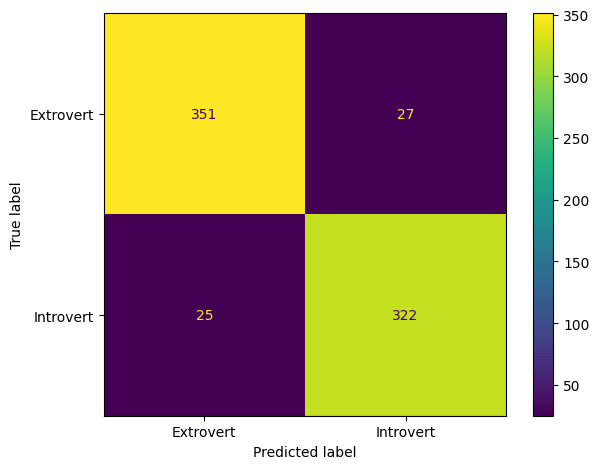

In [284]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf_ensemble, X_test, y_test, display_labels=target_names
)
plt.tight_layout()
plt.show()

In [285]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_linear, target_names=target_names))

              precision    recall  f1-score   support

   Extrovert       0.93      0.93      0.93       378
   Introvert       0.92      0.93      0.93       347

    accuracy                           0.93       725
   macro avg       0.93      0.93      0.93       725
weighted avg       0.93      0.93      0.93       725



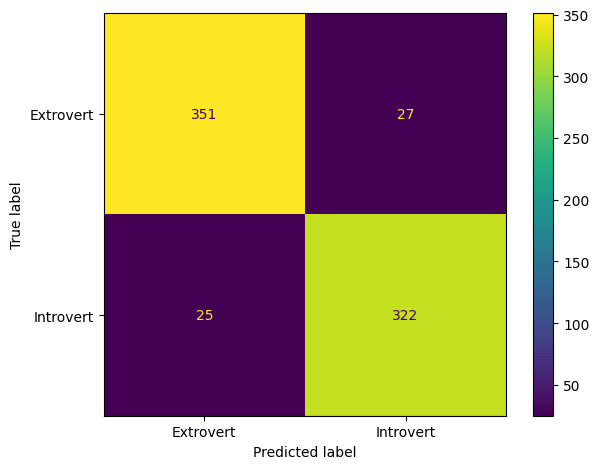

In [286]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf_linear, X_test, y_test, display_labels=target_names
)
plt.tight_layout()
plt.show()

In [287]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tree, target_names=target_names))

              precision    recall  f1-score   support

   Extrovert       0.93      0.93      0.93       378
   Introvert       0.92      0.93      0.93       347

    accuracy                           0.93       725
   macro avg       0.93      0.93      0.93       725
weighted avg       0.93      0.93      0.93       725



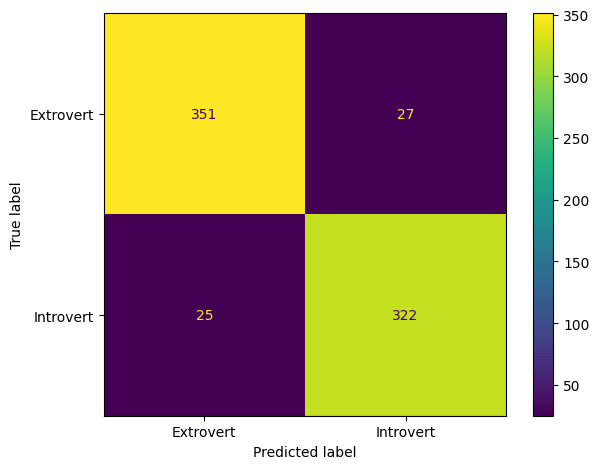

In [288]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf_tree, X_test, y_test, display_labels=target_names
)
plt.tight_layout()
plt.show()